In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("revenue_prediction.csv")
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [3]:
df.shape

(100, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [5]:
df.columns

Index(['Id', 'Name', 'Franchise', 'Category', 'City', 'No_Of_Item',
       'Order_Placed', 'Revenue'],
      dtype='object')

In [6]:
df.dtypes

Id                int64
Name             object
Franchise        object
Category         object
City             object
No_Of_Item        int64
Order_Placed    float64
Revenue           int64
dtype: object

In [7]:
# Check for missing values

df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

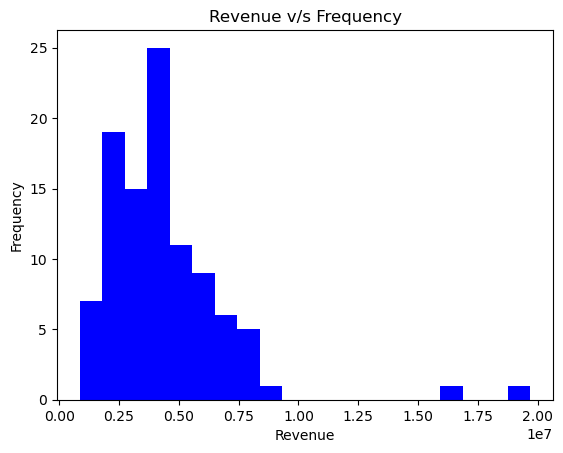

In [8]:
# Data visualizations

plt.hist(df['Revenue'], bins = 20, color = 'blue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue v/s Frequency')
plt.show()

C:\Users\shafi\AppData\Local\Temp\ipykernel_16352\157444894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


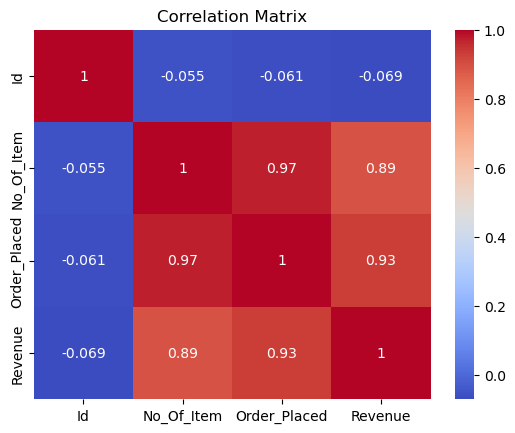

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

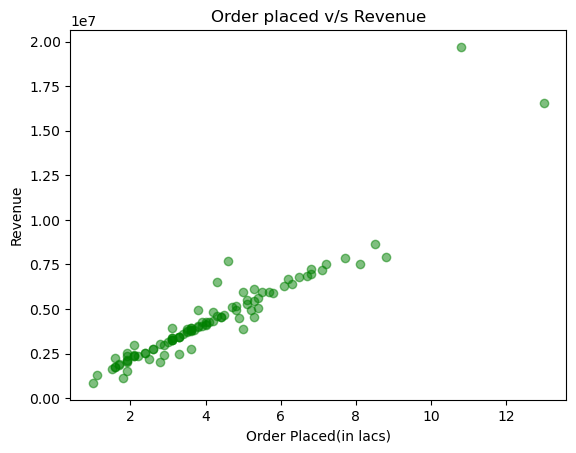

In [10]:
plt.scatter(df['Order_Placed'], df['Revenue'], alpha = 0.5, color = 'green')
plt.xlabel('Order Placed(in lacs)')
plt.ylabel('Revenue')
plt.title('Order placed v/s Revenue')
plt.show()

In [11]:

# Apply one-hot encoding to 'Franchise' column
df = pd.get_dummies(df, columns=['Franchise'], drop_first=True)

# Now, 'Franchise' has been one-hot encoded into 'Franchise_Yes'


In [12]:
df.columns

Index(['Id', 'Name', 'Category', 'City', 'No_Of_Item', 'Order_Placed',
       'Revenue', 'Franchise_Yes'],
      dtype='object')

# Linear Regression

In [14]:
X = df[['Franchise_Yes', 'No_Of_Item', 'Order_Placed']]
y = df['Revenue']

In [15]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = Lr.predict(X_test)
y_pred

array([6810509.71666439, 5974959.64658593, 3913862.7500266 ,
       3846952.30587728, 4380012.44692696, 3860634.34085848,
       4166840.12713165, 3611890.18724349, 3842977.76551006,
       6530168.26959693, 5908049.20243661, 3083063.26968387,
       3078830.04619381, 1995053.18874603, 3363146.03362849,
       4699900.26818133, 4753128.67734945, 1448311.01271515,
       1466226.27118641, 1839342.5016089 ])

In [30]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.8433127666023478